In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

### Hamiltonian

####  $H=\begin{pmatrix}1 & 0 &0 &0 \\ 0 &0&-1&0 \\0&-1&0&0\\0&0&0&1 \end{pmatrix} =0.5 I \otimes I + 0.5 Z \otimes Z -0.5 X \otimes X -0.5 Y \otimes Y$ 

In [2]:
from qiskit.quantum_info import Operator
from qiskit.aqua.operators import WeightedPauliOperator,  X, Z, I
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.aqua.algorithms import VQE

In [3]:
pauli_dict = {
    'paulis': [{"coeff": {"imag": 0.0, "real": 0.5}, "label": "II"},
              {"coeff": {"imag": 0.0, "real": 0.5}, "label": "ZZ"},
              {"coeff": {"imag": 0.0, "real": -0.5}, "label": "YY"},
               {"coeff": {"imag": 0.0, "real": -0.5}, "label": "XX"}
              ]
}
qubit_op = WeightedPauliOperator.from_dict(pauli_dict)
print(qubit_op.print_details())

II	(0.5+0j)
ZZ	(0.5+0j)
YY	(-0.5+0j)
XX	(-0.5+0j)



### Circuit

In [4]:
from qiskit import QuantumCircuit,execute,Aer
import numpy as np
import cmath
from math import pi
from random import uniform

In [5]:
from qiskit.circuit import ParameterVector
p = ParameterVector('p', 1)  

ansatz=QuantumCircuit(2)
ansatz.h(0)
ansatz.cx(0,1)
ansatz.rx(p[0],0)

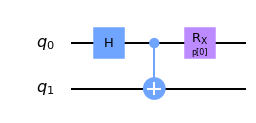

In [6]:
from qiskit.circuit import Parameter
var_circ=ansatz
var_circ.draw(output='mpl',plot_barriers=0)

In [7]:
optimizer = COBYLA(maxiter=100)
backend = Aer.get_backend('statevector_simulator')
vqe = VQE(operator=qubit_op, optimizer=optimizer, quantum_instance=backend)

In [8]:
vqe.var_form = var_circ
result = vqe.compute_minimum_eigenvalue()
print('VQE:', result.eigenvalue.real)

VQE: -0.9999999910500572
